# Problem 1

## Die photo

![Alt text](image.png)


```

























```

### 1.1

If k is the number of faces in of my die, k = 6 in my case


### 1.2

I do believe my dice is fair for many reasons. It has 6 distinct sides (i.e. no repeated values), it has smooth edges and a consistent shape and material. Although the fact that each side has a different extent of engravings in it due to the shape of different numbers, I still believe it is a fair die.

### 1.3

The following cell shows the experiment I ran with 301 independant trials. I created a string to which I kept adding to as I did my trial. I then converted the string into a list where each element is the result of each trial.

In [17]:
results = '''6164245615561323514366443335242225222636613564611231134554444313
             5626456116323161513545342325614646436643622152512566444442455444
             5553662326646534623266634313256412425261645533335455362316641111
             4564341243451555642523426364445634526145234251415113326265412565
             245642411335664643652353631325352414651255454'''
             
results_list = []
total_count = len(results)

for char in results:
    results_list.append(int(char))


print(results_list)
print(total_count)

[6, 1, 6, 4, 2, 4, 5, 6, 1, 5, 5, 6, 1, 3, 2, 3, 5, 1, 4, 3, 6, 6, 4, 4, 3, 3, 3, 5, 2, 4, 2, 2, 2, 5, 2, 2, 2, 6, 3, 6, 6, 1, 3, 5, 6, 4, 6, 1, 1, 2, 3, 1, 1, 3, 4, 5, 5, 4, 4, 4, 4, 3, 1, 3, 5, 6, 2, 6, 4, 5, 6, 1, 1, 6, 3, 2, 3, 1, 6, 1, 5, 1, 3, 5, 4, 5, 3, 4, 2, 3, 2, 5, 6, 1, 4, 6, 4, 6, 4, 3, 6, 6, 4, 3, 6, 2, 2, 1, 5, 2, 5, 1, 2, 5, 6, 6, 4, 4, 4, 4, 4, 2, 4, 5, 5, 4, 4, 4, 5, 5, 5, 3, 6, 6, 2, 3, 2, 6, 6, 4, 6, 5, 3, 4, 6, 2, 3, 2, 6, 6, 6, 3, 4, 3, 1, 3, 2, 5, 6, 4, 1, 2, 4, 2, 5, 2, 6, 1, 6, 4, 5, 5, 3, 3, 3, 3, 5, 4, 5, 5, 3, 6, 2, 3, 1, 6, 6, 4, 1, 1, 1, 1, 4, 5, 6, 4, 3, 4, 1, 2, 4, 3, 4, 5, 1, 5, 5, 5, 6, 4, 2, 5, 2, 3, 4, 2, 6, 3, 6, 4, 4, 4, 5, 6, 3, 4, 5, 2, 6, 1, 4, 5, 2, 3, 4, 2, 5, 1, 4, 1, 5, 1, 1, 3, 3, 2, 6, 2, 6, 5, 4, 1, 2, 5, 6, 5, 2, 4, 5, 6, 4, 2, 4, 1, 1, 3, 3, 5, 6, 6, 4, 6, 4, 3, 6, 5, 2, 3, 5, 3, 6, 3, 1, 3, 2, 5, 3, 5, 2, 4, 1, 4, 6, 5, 1, 2, 5, 5, 4, 5, 4]
301


In the following cell I numpy to return the unique values and their counts to which I then converted into a dictionary but itterating through both lists at the same time (unique_elements and counts) using the zip() funtction. The dictionairy name count_elements_dict has keys referring to the trial result and values referring to the frequency at which that results was observed.

In [18]:
import numpy as np

unique_elements, counts = np.unique(results_list, return_counts=True)

count_elements_dict = dict(zip(unique_elements, counts))

print(count_elements_dict)

{1: 39, 2: 44, 3: 48, 4: 60, 5: 55, 6: 55}


In [19]:
probability = []
for i in count_elements_dict.values():
    probability.append(round(i/total_count, 3))

print(probability)
print(sum(probability))

[0.13, 0.146, 0.159, 0.199, 0.183, 0.183]
1.0000000000000002


The zip(*data_dict.items()) expression unpacks the dictionary items into two tuples, one for keys and one for values.
The * operator in the plt.bar() function call unpacks these tuples into separate arguments for the plt.bar() function.

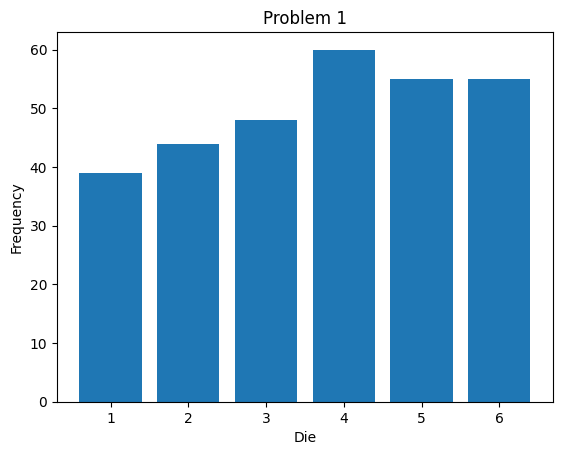

In [20]:
import matplotlib.pyplot as plt

plt.bar(*zip(*count_elements_dict.items()))

plt.title('Problem 1')
plt.xlabel('Die')
plt.ylabel('Frequency')

plt.show()

Overall the die seems to be quite fair. It has a higher occurence of 4 based off my trials, but it is important to keep in mind that I only had around 300 trials which is not enough to conclude with 100% confidence that it is an unfair die.

### 1.4

In order to generate the table which had the columns of ['Observed Frequency', 'Expected Frequency', 'Squared Difference', 'Normalized Squared Difference'] I first had to create 2 functions. o_minus_e_sqrd computes the 'Squared Difference' for each k (1 through 6). It takes in the parameters of Oi and E (observed and expected frequencies) and itterates through them while applying the formula. The same concept applies to the 2nd function but this time it utilises a different formula. 

When creating the Data frame object I define the column 'Face' to have rows with values 1-6. 
The 'expected frequency' to be the values of each key of the dictionary count_elements_dict (dict with keys 1-6 and values being the frequency).
The 'squared difference' column was made by calling the o_minus_e_sqrd() function with the first parameter being a list of the 'values' from the dictionary(count_elements_dict) and the second parameter being a list of 301/6 (i.e the expected frequency of a fair die rolled 301x)
Same for 'normalised square difference' column

In [21]:
import pandas as pd

def o_minus_e_sqrd(observed_freq, expected_freq):
    o_minus_e_sqrd = []
    for x, y in zip(observed_freq, expected_freq):
        o_minus_e_sqrd.append((x - y) ** 2)       
    return o_minus_e_sqrd


def norm_o_minus_e_sqrd(observed_freq, expected_freq):
    norm_o_minus_e_sqrd = []
    for x, y in zip(observed_freq, expected_freq):
        norm_o_minus_e_sqrd.append(((x - y) ** 2) / y)
    return norm_o_minus_e_sqrd

df = pd.DataFrame({'Face' : [i for i in range (1,7)],
                   
                   'Observed Frequency' : count_elements_dict.values(),
                   
                   'Expected Frequency' : [(1/6) * total_count for i in range(6)],
                   
                   'Squared Difference' : o_minus_e_sqrd(count_elements_dict.values(), 
                                                         [(1/6) * total_count for i in range(6)]),
                   
                   'Normalized Squared Difference' : norm_o_minus_e_sqrd(count_elements_dict.values(), 
                                                                         [(1/6) * total_count for i in range(6)])
                   })

Chi_squared_test = df['Normalized Squared Difference'].sum()  #summation of the column entries

display(df)
print(f'X = ∑𝑂𝑖−𝐸)^2/𝐸 =  {Chi_squared_test:.2f}') #formating the X value to have 2 decimal positions



,Face,Observed Frequency,Expected Frequency,Squared Difference,Normalized Squared Difference
0,1,39,50.166667,124.694444,2.485604
1,2,44,50.166667,38.027778,0.758029
2,3,48,50.166667,4.694444,0.093577
3,4,60,50.166667,96.694444,1.927464
4,5,55,50.166667,23.361111,0.465670
5,6,55,50.166667,23.361111,0.465670


X = ∑𝑂𝑖−𝐸)^2/𝐸 =  6.20


Computing X gave 6.2 which is quite close to k-1 = 5. This indicates the die is not too far off being fair

# Problem 2

### 2.1
 The following cell utilizes a function which was defined one cell later
 

In [48]:
print(stimulate_exp(301))

16.24252491694352


### 2.2

In the following cell I define a function which simulates the rolling of a die any given number of 'num_trials'. It then computes X and returns the Value of X. I then proceed to run this funtion 100 times, creating 100 experiments of 301 trials each.

In order to create the observed frequences I use the randint function from the random module and create a psuedo random number ranging from 1-6 (endpoints included). I create the list of observes frequences by first preforming a list comprehension which is concise way to create lists in Python. It allows you to construct a new list by applying an expression to each item in an existing iterable (I have been using this method through out the cells). After the list comprehension I call a Counter() function which created a dicionnary with keys being 1 through 6 and the associated values being the number of observations for each key.

In order to create the epected frequencies I simply preform a list comprehension and cause each element to be that whcih is expected of a fair die (value depends on the input 'num_trials')

X is then computed by calling the previous defined function 'norm_o_minus_e_sqrd' and then summed() up

Finally, I preform a final list comprehnsion of 100 trials to create a list of 100 values each containing the X value per expirement.



In [22]:
import random
from collections import Counter

def stimulate_exp(num_trials):
    observed_freq = Counter([random.randint(1,6) for i in range(num_trials)])
    expected_freq = [(1/6) * num_trials for i in range(6)]
    
    X = sum(norm_o_minus_e_sqrd(observed_freq.values(), expected_freq))
    
    return X

list_B_100exp = [stimulate_exp(300) for _ in range(100)]
list_B_100exp.sort(reverse=True)
    
for num in list_B_100exp:
    print(f'{num:.2f}')
    
        

14.92
12.28
11.88
11.56
11.36
11.28
11.28
11.16
11.04
10.96
10.68
10.40
10.04
10.00
9.80
9.80
9.56
8.92
8.88
8.72
8.28
8.08
8.08
7.88
7.84
7.80
7.76
7.52
7.28
7.12
7.04
6.88
6.72
6.52
6.40
6.32
6.28
6.08
6.08
6.04
6.00
5.84
5.72
5.56
5.44
5.16
5.00
4.96
4.92
4.72
4.72
4.60
4.60
4.60
4.52
4.48
4.40
4.32
4.12
4.04
3.96
3.88
3.84
3.84
3.76
3.76
3.68
3.64
3.60
3.56
3.44
3.40
3.16
3.12
2.96
2.96
2.92
2.80
2.72
2.52
2.52
2.40
2.20
2.12
2.08
2.04
1.80
1.76
1.76
1.72
1.52
1.48
1.44
1.44
1.44
1.28
1.24
1.16
1.08
1.08


I then plot the histogram in 6 equally spaced out bins and plot the symbols of the mean of the simulated Xbs (denoted by o), the number of faces K (denoted by X), and the value from experiment 1 denoted by a upward facing triangle.

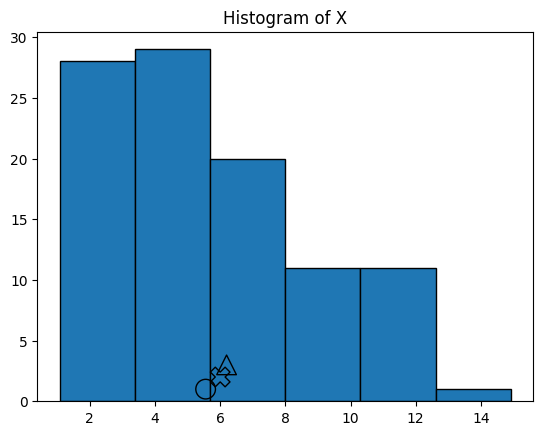

In [47]:
plt.hist(list_B_100exp, bins=6, edgecolor='black')
plt.title('Histogram of X')


mean = sum(list_B_100exp) / len(list_B_100exp)
k = 6
X_prob_1 = Chi_squared_test

values = [mean, k, X_prob_1]
y_values = [1,2,3]
symbols = ['o', 'X', '^']

for value, y_value, symbol in zip(values, y_values, symbols):
    plt.scatter(value, y_value, marker=symbol, facecolor='none', edgecolor='black', s=200, linewidths=1)


plt.show()



In [49]:
print(values)

[5.5532, 6, 6.196013289036545]


# Conclusion

Upon conducting 100 simulated experiments and plotting the histogram of \(X\) values, it's observed that the majority of \(X\) occurrences fall within the bin range of 2.5 to 5. The mean (\(\bar{X_b}\)) of these 100 \(X_b\) values is 5.5532, which is close to \(k-1\) (which is 5). The value of \(X\) from my physical experiment is 6.196013289036545, and the value of \(k\) is 6. 

Given the proximity of my physical experiment's \(X\) value to both \(k\) and the average of the simulated \(X_b\) values, it appears that my die is behaving fairly closely to a fair die in a statistical sense. However, the slight deviation of my physical \(X\) value from \(k-1\) and \(k\) does suggest there could be a minor bias, but it's within a reasonable range of the expected values for a fair die. 

Therefore, based on this analysis, there isn't strong evidence to suggest that my die is unfair, and it's reasonable to consider it as a fair die. Nonetheless, a more formal hypothesis testing could provide a more definitive conclusion regarding the fairness of the die.